# Entrega 1
## Exploración de Datos
Este notebook contiene una exploración básica del archivo train.csv.

In [ ]:
# Instalar librerías en caso de no tenerlas instaladas
%pip install pandas
%pip install matplotlib

In [1]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Cargar archivo train.csv
file = "/content/drive/MyDrive/Materia: Inteligencia Artificial - Python/Kaggle/data kaggle competicion/train.csv"
df = pd.read_csv(file)
df.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


### 1. Número de estudiantes por programa académico

In [4]:
# Cantidad de estudiantes por programa
df_estudiantes_por_programa = df['ESTU_PRGM_ACADEMICO'].value_counts()
df_estudiantes_por_programa

,count
ESTU_PRGM_ACADEMICO,
DERECHO,53244
ADMINISTRACION DE EMPRESAS,51902
CONTADURIA PUBLICA,39664
PSICOLOGIA,31932
INGENIERIA INDUSTRIAL,28481
...,...
LICENCIATURA EN ESPAÑOL Y FILOLOGÍA,1
ADMINISTRACION EN NEGOCIOS INTERNACIONALES,1
ADMINISTRACION DE COMERCIO EXTERIOR,1


### 2. Número de estudiantes por departamento

In [5]:
# Cantidad de estudiantes por departamento
df_estudiantes_por_departamento = df['ESTU_PRGM_DEPARTAMENTO'].value_counts()
df_estudiantes_por_departamento

,count
ESTU_PRGM_DEPARTAMENTO,
BOGOTÁ,282159
ANTIOQUIA,83607
VALLE,44588
ATLANTICO,41020
SANTANDER,28828
NORTE SANTANDER,22588
BOLIVAR,20629
BOYACA,14048
CUNDINAMARCA,14018


### 3. Horas semanales que trabajan los estudiantes

In [6]:
# Cantidad de horas que trabajan los estudiantes a la semana
df_trabajo_por_semana_estudiantes = df['ESTU_HORASSEMANATRABAJA'].value_counts()
df_trabajo_por_semana_estudiantes

,count
ESTU_HORASSEMANATRABAJA,
Más de 30 horas,249352
0,116550
Entre 11 y 20 horas,115857
Entre 21 y 30 horas,92693
Menos de 10 horas,87191


### 4. Gráfico de comparativa entre el valor de la matrícula del estudiante y el estrato de vivienda familiar

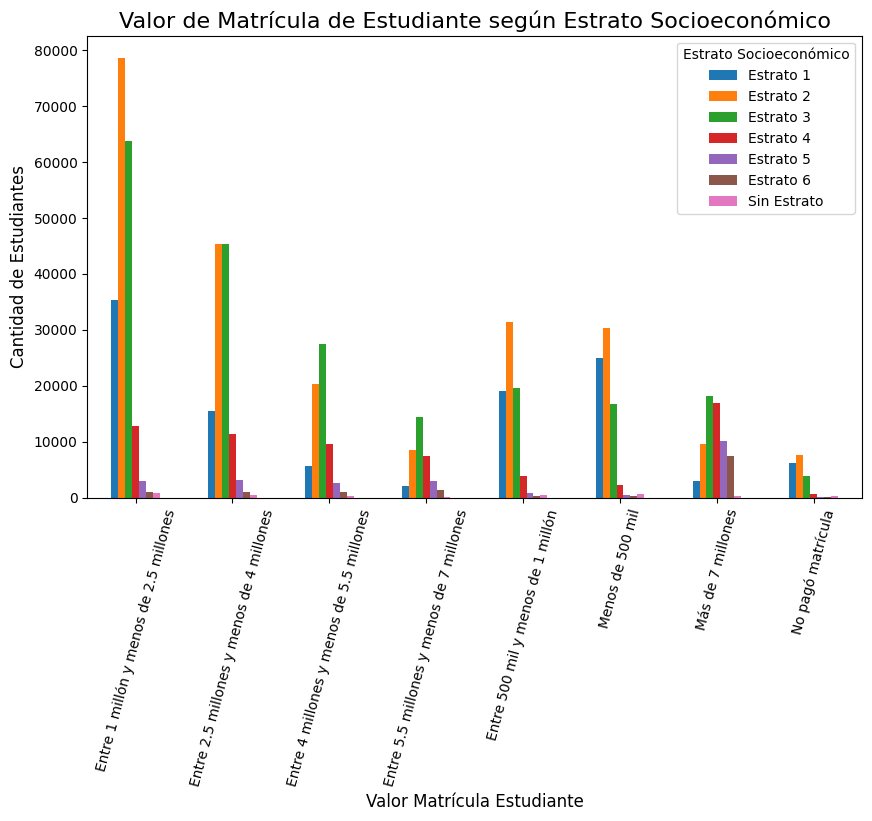

In [7]:
# Agrupar datos por valor de matrícula y estrato socioeconómico, y contar la cantidad de estudiantes
grouped_data = df.groupby(['ESTU_VALORMATRICULAUNIVERSIDAD', 'FAMI_ESTRATOVIVIENDA']).size().unstack()

# Crear gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(10, 6))
grouped_data.plot(kind='bar', ax=ax)

# Añadir títulos y etiquetas
plt.title('Valor de Matrícula de Estudiante según Estrato Socioeconómico', fontsize=16)
plt.xlabel('Valor Matrícula Estudiante', fontsize=12)
plt.ylabel('Cantidad de Estudiantes', fontsize=12)
plt.xticks(rotation=75)

# Mostrar leyenda y gráfico
plt.legend(title='Estrato Socioeconómico')
plt.show()